In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import mat73
import scipy.signal as ss
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os
from scipy import signal
plt.rcParams['font.size'] = 18

In [2]:
plt.rcParams['text.usetex'] =True
plt.rcParams['font.family'] = 'serif',
plt.rcParams['font.serif'] =  'Computer Modern'

In [6]:
cd new_data_thalamus/

D:\new_data_thalamus


## Thalamo-cortical dataset

In [3]:
path = "C:/Users/Benedetta/Downloads/Barrel+Talamo/Barrel+Talamo"

In [6]:
os.chdir(path)
import warnings
warnings.filterwarnings("ignore")

In [5]:
#### THALAMUS DATA
import os
import numpy as np
import scipy.signal as ss
from scipy import signal
import mat73

w =  7
numf = 50
nrat = 1
start = 3
nchan_c=27
nchan = 30
T=10
fs=25000


for rat in [nrat]:
    thalamus = 1
    for file in [os.listdir()[start:][rat]]:
        if file == 'Figs': continue
        print(os.getcwd(), file)
        data_dict = mat73.loadmat(file)
        data = data_dict['amplifier_data']
        if thalamus: stim = data_dict['adc_data'][0]
        if not thalamus: stim = data_dict['adc_data']
        indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
        indexes = np.array(indexes.tolist() + [int(indexes[-1] + np.diff(indexes)[-1])]) - 125
        fs = 25000
        conv = 1/fs
        nyq = 0.5*fs
        low = 0.1/nyq 
        high = 50/nyq
        b,a = ss.butter(2,[low,high], "bandpass")
        sig = ss.filtfilt(b,a,data,axis = 1,)
        del data
        if thalamus:
            fs = 25000.0  # Sample frequency (Hz)
            f0 = 100.0  # Frequency to be removed from signal (Hz)
            Q = 30.0  # Quality factor
            # Design notch filter
            b, a = ss.iirnotch(f0, Q, fs)
            sig2 =  ss.filtfilt(b,a,sig,axis = 1)
        else:
            sig2 = sig
        del sig
        if thalamus:
            lfpTrials = []
            for r in range(1,len(indexes)-1):
                sigg = sig2[:nchan_c,indexes[r]-int(fs):indexes[r]+ int(fs*T)]
                lfpTrials.append(sigg)
            lfpTrials = np.array(lfpTrials)
            lfpTrials = np.delete(lfpTrials,[12,13,14,15,16,17,18,19],1)
        else:
            lfpTrials = []
            for r in range(1,len(indexes)-1):
                sigg = (sig2[:nchan,indexes[r]-int(fs):indexes[r]+ int(fs*T)])
                lfpTrials.append(sigg)
            lfpTrials = np.array(lfpTrials)
    

C:\Users\Benedetta\Downloads\Barrel+Talamo\Barrel+Talamo Piezo_02_220117_115929.mat


In [7]:
sig_th2 = lfpTrials[:,10,:25000*4]
sig_th_cort2 = lfpTrials[:,17,:25000*4]

sig_th2 = sig_th2[:,np.newaxis,:]
sig_th_cort2 = sig_th_cort2[:,np.newaxis,:]
mat_th2 =[]

w =  7
numf = 50
fac = 10
fs = 25000/fac
for chan in [0]:
    for trial in range(sig_th2.shape[0]):
        sig  = signal.decimate(sig_th2[trial,chan,:],fac)
        freq = np.logspace(np.log10(1), np.log10(25), numf)
        widths = w*fs / (2*freq*np.pi)
        cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
        mat_th2.append(np.real((cwtm)*np.conjugate(cwtm))) 
mat_th2 = np.array(mat_th2)

mat_th_cort2 =[]
w =  7
numf = 50
fac = 10
fs = 25000/fac
for chan in [0]:
    for trial in range(sig_th2.shape[0]):
        sig  = signal.decimate(sig_th_cort2[trial,chan,:],fac) 
        freq = np.logspace(np.log10(1), np.log10(25), numf)
        widths = w*fs / (2*freq*np.pi)
        cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
        mat_th_cort2.append(np.real((cwtm)*np.conjugate(cwtm))) 
        
mat_th_cort2 = np.array(mat_th_cort2)
mat_th_cort2.shape

(28, 50, 10000)

In [9]:
del sigg, sig2, lfpTrials


## Loading other datasets

In [10]:
import os
import numpy as np
import scipy.signal as ss
import mat73

thalamus = True
if not thalamus:
    rat = 4
    file = os.listdir()[1:][rat]
    import mat73
    data_dict = mat73.loadmat(file)
    data = data_dict['amplifier_data']
    stim = data_dict['adc_data']
    indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
    indexes = np.array(indexes.tolist() + [int(indexes[-1] + np.diff(indexes)[-1])]) - 125
    fs = 25000

if thalamus:
    file = os.listdir()[start:][rat]
    data_dict = mat73.loadmat(file)
    data = data_dict['amplifier_data']
    stim = data_dict['adc_data'][0]
    indexes = (np.where(stim> 1.5)[0])[np.where(np.diff(np.where(stim> 1.5)[0])>1)]
    indexes = np.array(indexes.tolist() + [int(indexes[-1] + np.diff(indexes)[-1])]) - 125
    fs = 25000


In [11]:
%load_ext autoreload
%autoreload 2

In [12]:
import sys
sys.path.append("C:/Users/Benedetta/Desktop/Criticality in barrel cortex/Thalamus/2024 work/Codes/Marianietal2026-PlosCompBio")

In [13]:
from functions import *

In [14]:
import os
import numpy as np
import scipy.signal as ss
import h5py
import numpy as np
from scipy import signal as ss
import h5py
import numpy as np
from scipy import signal as ss
import os
from tqdm import tqdm 

nTrials = 1
nchan_c = 27
nchan = 30
fs =25000
T = 10


r = 0
with h5py.File(f'{file}', 'r') as f:
    data_ds = f['amplifier_data'][indexes[r]:indexes[r]+ int(fs*T)]  
    #print(data_ds.shape)
    fs = f['sampling_frequency'][0][0]      
    b, a = ss.butter(2, [300, 3000], btype='bandpass', fs=fs)
    spikes = np.zeros((data_ds.shape[1],data_ds.shape[0]), dtype=np.float32)
    for i in tqdm(range(spikes.shape[0])):
        spikes[i, :] = ss.filtfilt(b, a,data_ds[:, i].astype(np.float32),)

    
print("Filtraggio completato.")
### detrending
spikes = (spikes - np.mean(spikes,0))
#del spikes_memmap
spikesTrials = []
if not thalamus:
    for r in range(nTrials):
        spikesTrials.append(spikes[:nchan_c,:])
    spikesTrials = np.array(spikesTrials)
else:
    spikes = (spikes[:nchan])    
    for r in range(nTrials):
        spikesTrials.append(spikes[:,:])
    spikesTrials = np.array(spikesTrials)


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 61.04it/s]

Filtraggio completato.


In [15]:
import os
import numpy as np
import scipy.signal as ss
import emd
fs = 25000
f0 = 100.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
nyq = 0.5*fs
low = 1/nyq
high = 50/nyq
b,a = ss.butter(2,[low,high], "bandpass")
# Design notch filter
b2, a2 = ss.iirnotch(f0, Q, fs)
#print(sig2.shape)
r=0
sig3 = ss.filtfilt(b,a,data[:,indexes[r]:indexes[r] + int(25000)*10],axis = 1)
sig3 = ss.filtfilt(b2,a2,sig3[:,:],axis = 1)
#print(sig3.shape)

if thalamus:
    sig3 = (sig3[:nchan])
    lfpTrials = []
    lfpTrials.append(sig3[:,:])    
    
if not thalamus:
    sig3 = sig3[:nchan_c]
    lfpTrials = []
    lfpTrials.append(sig3[:,:])          
lfpTrials = np.array(lfpTrials)


In [19]:
lfpTrials.shape

(1, 30, 250000)

In [16]:
nch = spikesTrials.shape[1]
num = spikesTrials.shape[0]
binspikes =  np.zeros((num,nch,spikesTrials.shape[2]), dtype = int)
soglia = 4
for r in range(num):
    for ch in range(nch):
        binspikes[r,ch,:] = findpeaks(spikesTrials[r,ch,:],Thres(soglia,spikesTrials[r,ch,:]),"neg", dist = 10)


# Figure 1

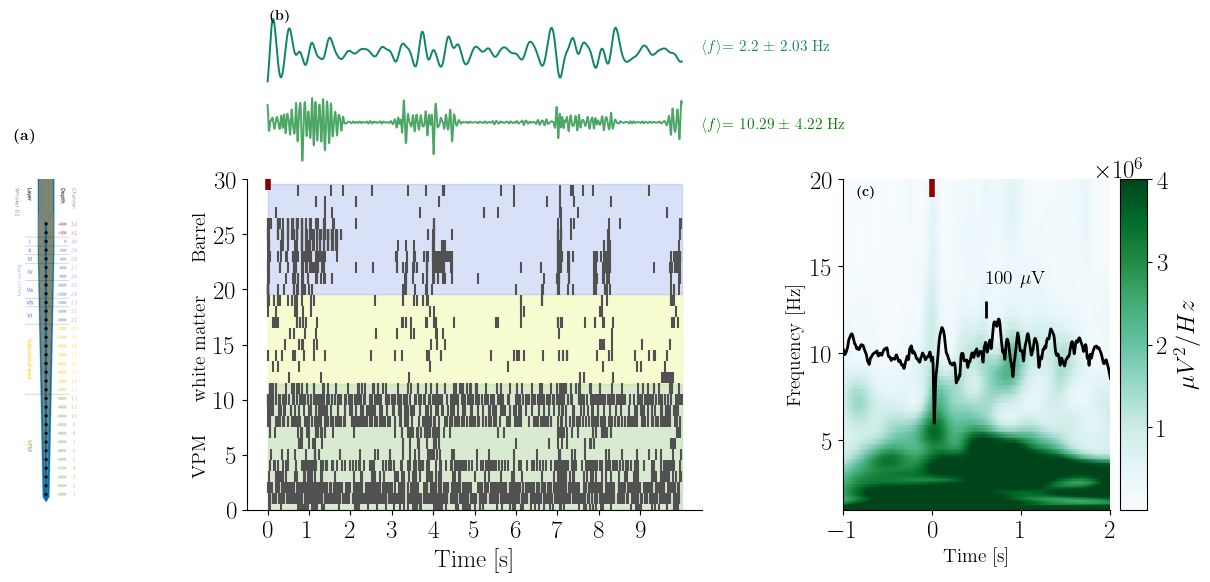

In [17]:
from matplotlib import cm
uptrial = 10
pos = []
s = 0
trial=s

plt.rcParams['axes.spines.top']= False
plt.rcParams['axes.spines.right']= False

for g in range(binspikes[trial].shape[0]):
    pos.append(np.where(binspikes[trial,g]>0)[0])
pos = np.asarray(pos)
fig= plt.figure(figsize = (15,3.5*2))


gs = fig.add_gridspec(8,5, width_ratios = [0.8,0.4,3., 0.4,2.],
                      height_ratios = [0.4,0.4,0.4,1,1,1,1,1])


path = 'C:/Users/Benedetta/Desktop/Criticality in barrel cortex/Thalamus/2024 work'

ax00 = fig.add_subplot(gs[4:8,0])
ax00.annotate('\\textbf{(a)}', size = 11,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(0.05,1.12), textcoords='axes fraction')
ax00.axis('off')
ax00.imshow(plt.imread(os.path.join(path,"probe_new.png")),)

ax00 = fig.add_subplot(gs[4:8, 2])
ax00.eventplot(pos, colors =cm.Greys(0.75));
ax00.set_xticks(np.arange(0,fs*10,fs))
ax00.set_xticklabels(np.array(np.arange(0,fs*10,fs)/fs, dtype =int))
ax00.set_xlabel('Time [s]')
ax00.set_ylabel('Channels')
ax00.axvspan(0,T*fs,0.,0.+0.380,color = cm.get_cmap('summer')(0.5), alpha =.3)
ax00.axvspan(0,T*fs,0.382,0.4+0.25,color = cm.get_cmap('summer')(0.9), alpha =.3)
ax00.axvspan(0,T*fs,0.4+0.252,0.4+0.252+0.3333,color = 'royalblue', alpha =.2)
ax00.vlines(0,29,30,color = 'darkred', lw = 4)
ax00.set_ylabel(r" VPM \hspace{0.5cm} white matter \hspace{0.5cm} Barrel", fontsize =14)
ax00.set_ylim(0,30)


ax00 = fig.add_subplot(gs[1:4, 2])
ax00.annotate('\\textbf{(b)}', size = 10,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(0.05,0.95), textcoords='axes fraction')
times = np.arange(0,fs*T,1)/fs
channel=25
v = emd.sift.mask_sift(lfpTrials[s,channel,:], mask_freqs= 30./fs, max_imfs=5, )
IP_, IF_, IA_ = emd.spectra.frequency_transform(v[:,3] + v[:,4], fs, 'nht')
IP, IF, IA = emd.spectra.frequency_transform(v, fs, 'nht')
ax00.plot(times, (v[:,4]  + v[:,3])*0.02+10, color = cm.get_cmap('summer')(0.05),lw= 1.4)
ax00.plot(times, v[:,1]*0.02, color = cm.get_cmap('summer')(0.3), lw=1.4)
ax00.set_xticks([])
ax00.axis('off')
value1, value2 = round(IF[:,1].mean(),2),round(IF[:,1].std(),2)
value3, value4 = round(IF_.mean(),2),round(IF_.std(),2)
ax00.annotate(r'$\langle f \rangle$'+f'= {value1} $\pm$ {value2} Hz', size = 11,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(1,0.25), textcoords='axes fraction', color ='green')
ax00.annotate(r'$\langle f  \rangle$'+f'= {value3} $\pm$ {value4} Hz', size = 11,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(1,0.75), textcoords='axes fraction', color = cm.get_cmap('summer')(0.05) )

axn = fig.add_subplot(gs[4:8,4])
axn.annotate('\\textbf{(c)}', size = 10,
                 xy=(1, 1), xycoords='axes fraction',
                 xytext=(0.05,0.95), textcoords='axes fraction')
fac = 10
sec =4
t = np.arange(0,int(fs/fac)*sec,1)/int(fs/fac) - 1
t_ = np.arange(0,int(fs/1)*sec,1)/int(fs/1) - 1
im = axn.pcolormesh(t[:int(fs/fac*(sec-1))], freq,np.mean(mat_th_cort2[:uptrial,:,:int(fs/fac*(sec-1))],0), cmap='BuGn', shading='gouraud', vmax =4e6)
axn.set_ylabel(r'Frequency [Hz]',fontsize = 14)
axn.text(0.6,13+1*100*0.01,r'100 $\mu$V', fontsize = 14)
axn.vlines(0.6,12,12+1*100*0.01, color = 'black',lw = 2)
axn.set_ylim(1,20)
axn.set_xlim(-1,2)
axn.plot(t_[:int(fs*(sec-1))],np.mean(sig_th_cort2[:uptrial,0,:int(fs*(sec-1))],0)*0.01 + 10, color ='black', lw = 2)
axn.vlines(0,19,20,color = 'darkred', lw = 4)
axn.set_xlabel(r'Time [s]',fontsize = 14)

divider = make_axes_locatable(axn)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im, cax=cax, label =r'$\mu V^2/Hz$');

